In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('analysis/sales_data_2022.csv')

In [3]:
df.head(3)

,Unnamed: 0,id,date_time,sales_manager_id__admin_name,user_id__customer_name,transactions_id__total_amount,name,quantity
0,0,1792,2022-01-16 15:06:38.941549+00:00,admin,maaz,518,mothercare baby oil l,2
1,0,1792,2022-01-16 15:06:38.941549+00:00,admin,maaz,518,ariel hs orig 500g jubilee,2
2,1,1794,2022-08-28 16:10:58.738156+00:00,admin,raza,2904,poly bag 7x11 (260 pcs) per kg (ob-p),1


In [4]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['Month'] = df['date_time'].dt.month

In [5]:
df.rename(columns={'date_time':'Date'}, inplace=True)
df.rename(columns={'sales_manager_id__admin_name':'Sales Person'}, inplace=True)
df.rename(columns={'user_id__customer_name':'Customer'}, inplace=True)
df.rename(columns={'transactions_id__total_amount':'Sales Amount'}, inplace=True)
df.rename(columns={'quantity':'Quantity'}, inplace=True)
df.rename(columns={'name':'Name'}, inplace=True) 

In [6]:
df.head(3)

,Unnamed: 0,id,Date,Sales Person,Customer,Sales Amount,Name,Quantity,Month
0,0,1792,2022-01-16 15:06:38.941549+00:00,admin,maaz,518,mothercare baby oil l,2,1
1,0,1792,2022-01-16 15:06:38.941549+00:00,admin,maaz,518,ariel hs orig 500g jubilee,2,1
2,1,1794,2022-08-28 16:10:58.738156+00:00,admin,raza,2904,poly bag 7x11 (260 pcs) per kg (ob-p),1,8


### Monthly sales 

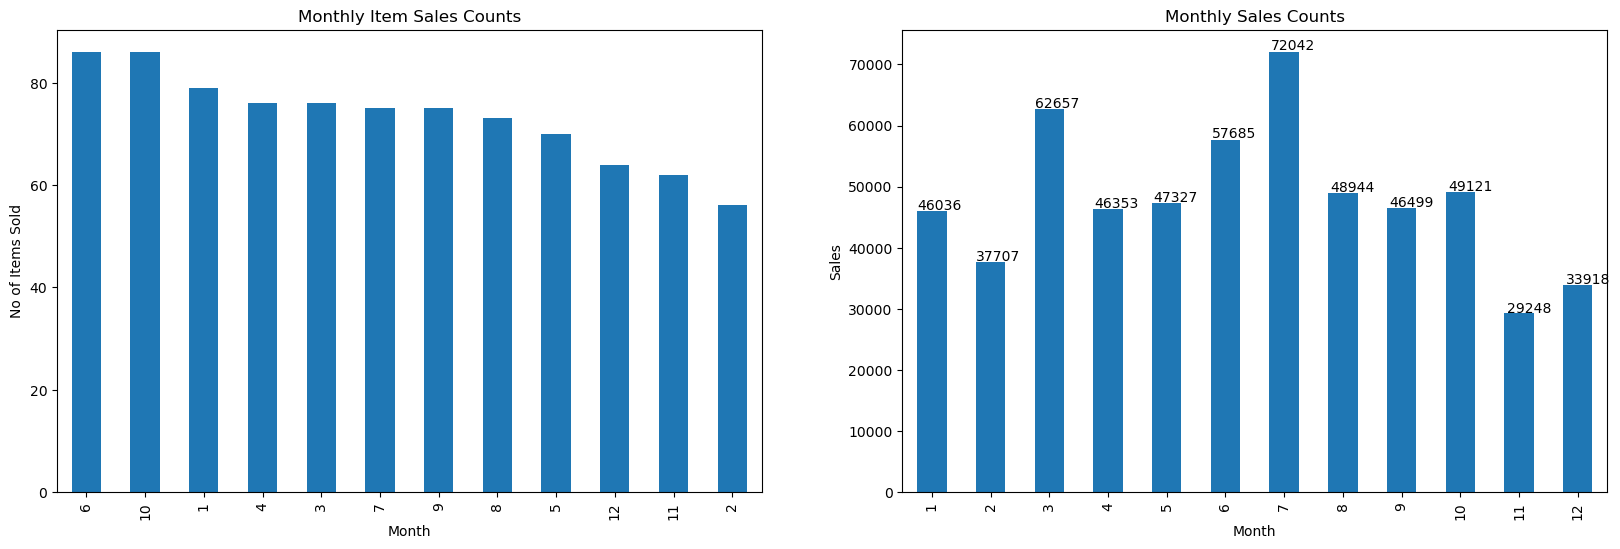

Highest selling Month: 7, Sale Amount: 72042


In [7]:

plt.figure(figsize=(20, 6)) 
plt.subplot(1, 2, 1) 
df['Month'].value_counts().plot(kind='bar')
plt.title('Monthly Item Sales Counts')
plt.xlabel('Month')
plt.ylabel('No of Items Sold')


plt.subplot(1, 2, 2) 
ax = df.drop_duplicates(subset='Date').groupby('Month')['Sales Amount'].sum().plot(kind='bar')
plt.title('Monthly Sales Counts')
plt.xlabel('Month')
plt.ylabel('Sales')

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

 
highest_selling_month = df.drop_duplicates(subset='Date').groupby('Month')['Sales Amount'].sum()
print(f"Highest selling Month: {highest_selling_month.idxmax()}, Sale Amount: {highest_selling_month[highest_selling_month.idxmax()]}")

### Top selling product in every month

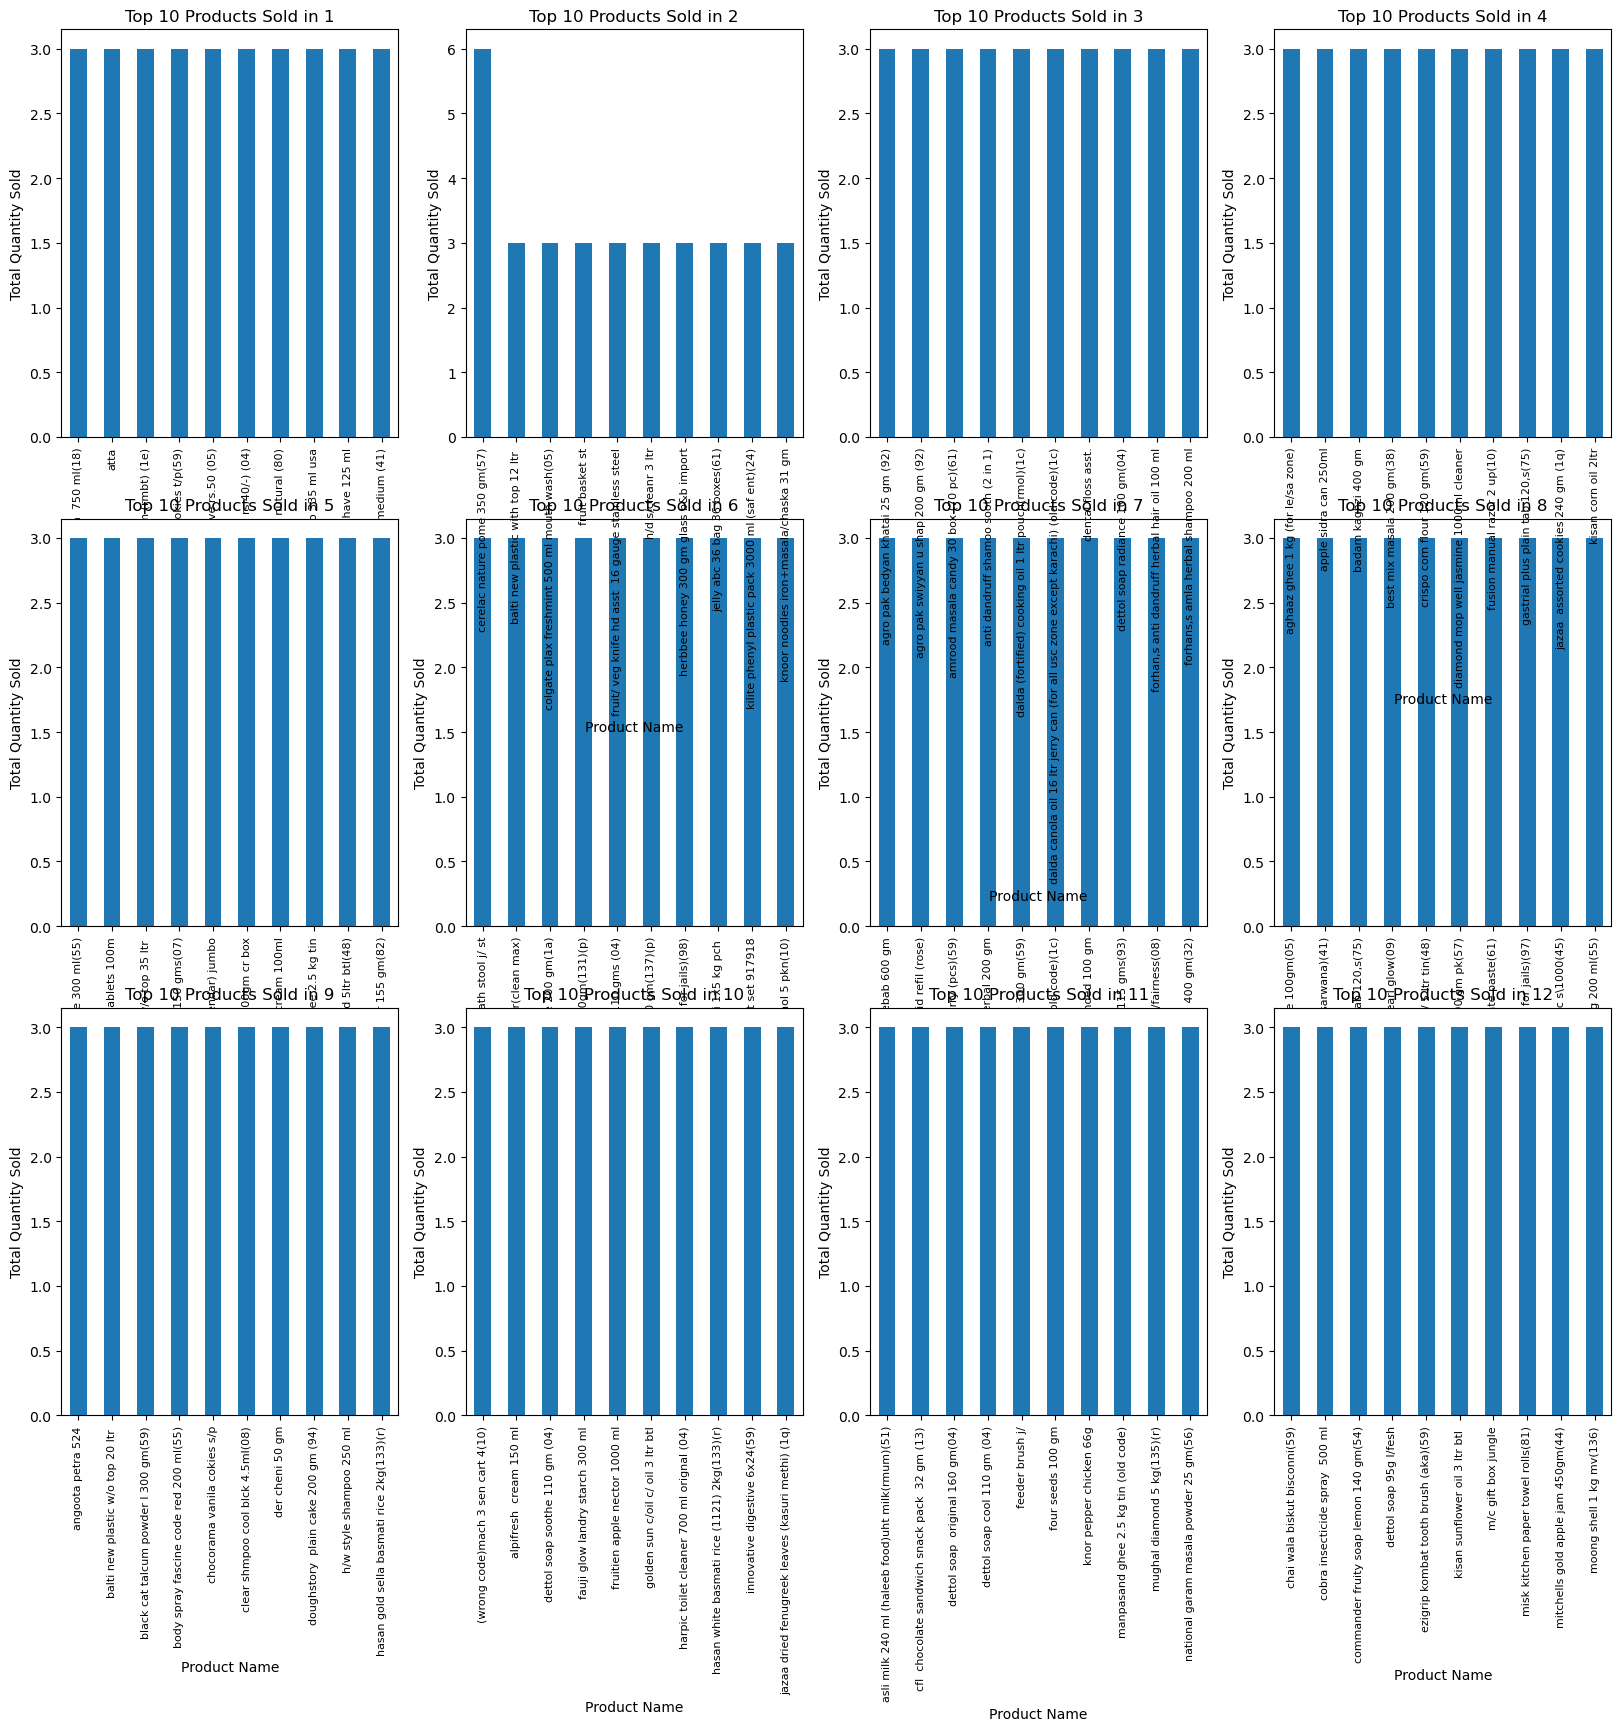

In [8]:
plt.figure(figsize=(20, 18))
for month in df['Month'].unique():
    plt.subplot(3, 4, month)
    mdf = df[df['Month'] == month]
    top_10_products = mdf.groupby('Name')['Quantity'].sum().nlargest(10)
    top_10_products.plot(kind='bar')
    plt.title(f'Top 10 Products Sold in {month}')
    plt.xlabel('Product Name')
    plt.ylabel('Total Quantity Sold')
    plt.xticks(rotation=90, fontsize=8)  # Adjust the fontsize here
    # plt.show()

Items Sells in month 1: 12
Items Sells in month 8: 8
Items Sells in month 12: 12
Items Sells in month 7: 9
Items Sells in month 4: 10
Items Sells in month 6: 11
Items Sells in month 3: 12
Items Sells in month 5: 9
Items Sells in month 9: 12
Items Sells in month 2: 9
Items Sells in month 10: 17
Items Sells in month 11: 9


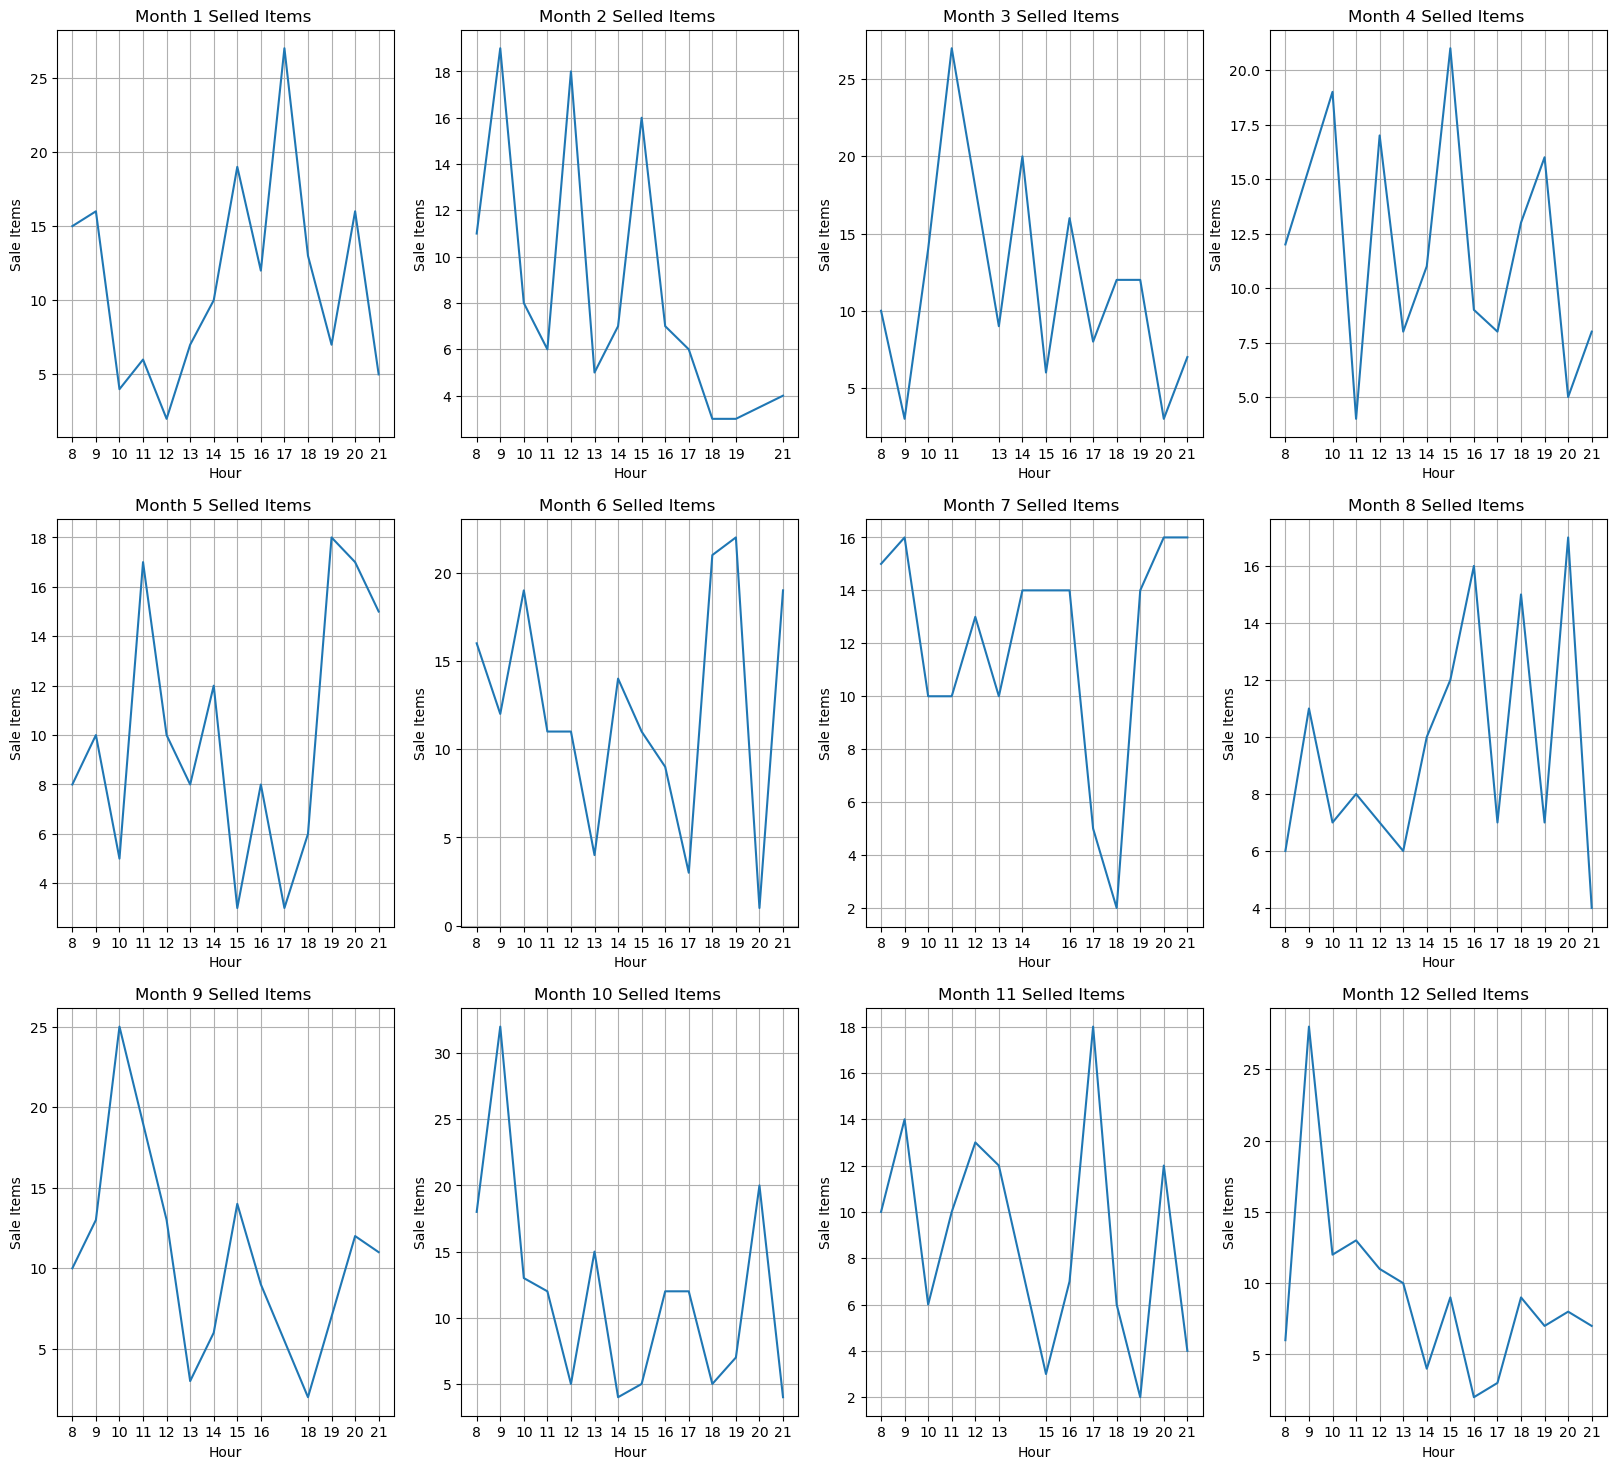

In [29]:
plt.figure(figsize=(20,18))
for month in df['Month'].unique():
    plt.subplot(3, 4, month)
    plt.title(f'Month {month} Selled Items ')
    plt.xlabel('Hour')
    plt.ylabel('Sale Items')
    m_df = df[df['Month'] == month].copy() 
    m_df['Hour'] = pd.to_datetime(df['Date']).dt.hour
    m_df['Minute'] = pd.to_datetime(df['Date']).dt.minute
    m_df['Count'] = 1
    m_df.head()
    keys = [pair for pair, df in m_df.groupby(['Hour'])] # in (n,1) format but we need (n,) format
    keys = [key[0] for key in keys]   # chanign into [] format
    plt.plot(keys, m_df.groupby(['Hour'])['Quantity'].sum())
    plt.xticks(keys)
    plt.grid()
    
    max_trend_value = m_df.groupby(['Hour']).count()['Count'].max()
    print(f"Items Sells in month {month}: {max_trend_value}")

